# Regressão Logística

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
TRAIN = 'data/titanic/train.csv'
TEST = 'data/titanic/test.csv'

## Primeira tentativa

In [3]:
train_data = pd.read_csv(TRAIN)
test_data = pd.read_csv(TEST)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# retirando a coluna de nome
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

# Tratando as variáveis 
for clmn in ['Sex', 'Embarked', 'Ticket', 'Cabin']:
  train_data[clmn] = train_data[clmn].astype('category').cat.codes
  test_data[clmn] = test_data[clmn].astype('category').cat.codes

# retirando todos os valores não existentes do treino e zerando-os no teste
train_data.dropna(inplace=True)
test_data.fillna(0, inplace=True)

In [8]:
x_train, y_train = train_data.iloc[:, 2:], train_data.iloc[:, 1]
x_test = test_data.iloc[:, 1:]

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

log_reg = LogisticRegression(fit_intercept=True)

In [10]:
log_reg.fit(x_train, y_train)

print(log_reg.score(x_val, y_val))

0.8181818181818182


/media/kenzo/Faculdade/9o semestre/Sistemas de Apoio a Decisão/sad/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
predictions = log_reg.predict(x_test)

In [12]:
result = pd.DataFrame()
result['PassengerId'] = test_data['PassengerId'].copy()
result['Survived'] = predictions

In [14]:
result.to_csv('data/titanic/1st-answer.csv', index=False)

## Segunda tentativa


In [15]:
train_data = pd.read_csv(TRAIN)
test_data = pd.read_csv(TEST)

In [16]:
train_data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Tratamento de dados faltantes.

Nesse passo, analisaremos como tratar os dados faltantes. Para isso, primeiro vamos olhar o quanto os estes dados afetam o conjunto de dados.

In [18]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Como há muita informação faltante sobre cabine, iremos remover essa coluna. Já com a idade, podemos utilizar uma técnica de imputação de dados. E por fim, substituiremos os valores faltantes que restarem por 0.


In [20]:
train_data.drop(labels='Cabin', axis=1, inplace=True)
test_data.drop(labels='Cabin', axis=1, inplace=True)

# imputação de dados sobre idade
train_data['Age'].interpolate(inplace=True)
test_data['Age'].interpolate(inplace=True)

# removendo os exemplos sem info de embarque
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

### Transformando valores categóricos 

Analisando os dados, podemos perceber que os atributos de sexo e embarque são categóricos. Porém, como queremos analisar a correlação entre os dados, transformaremos estas colunas em categorias numéricas.

In [21]:
replace_map = { 'Embarked': {'C':0, 'Q': 1, 'S':2}, 'Sex': {'female':0, 'male':1}}
train_data.replace(replace_map, inplace=True)
test_data.replace(replace_map, inplace=True)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


Agora, antes de analisarmos a correlação dos dados, vamos retirar as colunas de nome, já que esta não é de fato relevante para a classificação.

In [22]:
train_data['Ticket'] = train_data['Ticket'].astype('category').cat.codes
test_data['Ticket'] = test_data['Ticket'].astype('category').cat.codes

In [23]:
train_data.drop(labels='Name', axis=1, inplace=True)
test_data.drop(labels='Name', axis=1, inplace=True)

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,2
1,2,1,1,0,38.0,1,0,596,71.2833,0
2,3,1,3,0,26.0,0,0,669,7.9250,2
3,4,1,1,0,35.0,1,0,49,53.1000,2
4,5,0,3,1,35.0,0,0,472,8.0500,2


### Análise da correlação dos dados

Nesse momento analisaremos a correlação dos dados com o que queremos predizer.

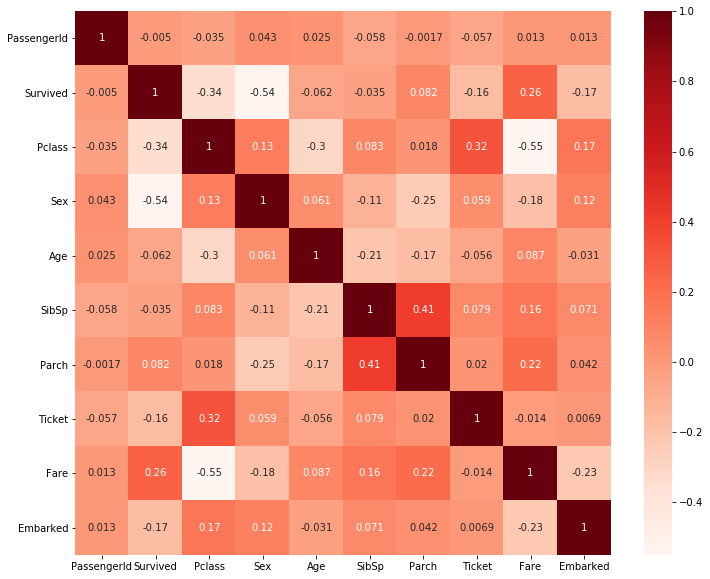

In [25]:
# obtendo a correlação
corr = train_data.corr()

# plot
plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

Então, podemos escolher as colunas com maior valor absoluto de correlação com o atributo de sobrevivência.

### Normalização dos dados

In [26]:
# normalização
def norm(df, column):
    aux = df[column]
    norm_aux = (aux - aux.min())/(aux.max() - aux.min())

    return norm_aux

In [27]:
train_data['Fare'] = norm(train_data, 'Fare')
test_data['Fare'] = norm(train_data, 'Fare')

### Separação dos dados, criação e treinamento do modelo

In [28]:
desired_clmns = ['Survived', 'PassengerId', 'Sex', 'Pclass', 'Fare', 'Embarked', 'Parch', 'Ticket']
x_train, y_train = train_data[desired_clmns[2:]], train_data[desired_clmns[0]]
x_test = test_data[desired_clmns[1:]]

In [29]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

log_reg = LogisticRegression(fit_intercept=True, max_iter=150)

In [30]:
log_reg.fit(x_train, y_train)
log_reg.score(x_val, y_val)

0.7988826815642458

### Preparando a submissão

In [31]:
predictions = log_reg.predict(x_test[desired_clmns[2:]])

In [32]:
result = pd.DataFrame()
result['PassengerId'] = x_test['PassengerId'].copy()
result['Survived'] = predictions

In [34]:
result.to_csv('data/titanic/2nd-answer.csv', index=False)